In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import kurtosis, skew
from scipy.stats import laplace_asymmetric

In [2]:
import matplotlib as mpl

# font = {'weight' : 'bold',
#         'size'   : 14}
font = {'size'   : 16}

mpl.rc('font', **font)

In [3]:
time_res = np.arange(0.025, 8, 0.2)
print(time_res)

def quantisation(data, q_step):
    sampled_set = np.zeros(len(data))

    for i in range(len(data)):
        x = data[i]
        exc = x % q_step
        sampled_set[i] = random.choices([x - exc, x + q_step - exc], weights=[1 - exc, exc])[0]
    return sampled_set

[0.025 0.225 0.425 0.625 0.825 1.025 1.225 1.425 1.625 1.825 2.025 2.225
 2.425 2.625 2.825 3.025 3.225 3.425 3.625 3.825 4.025 4.225 4.425 4.625
 4.825 5.025 5.225 5.425 5.625 5.825 6.025 6.225 6.425 6.625 6.825 7.025
 7.225 7.425 7.625 7.825]


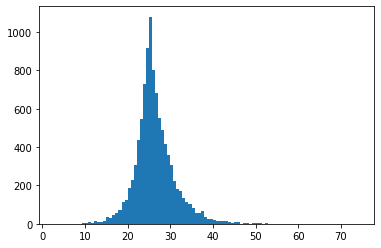

In [9]:
test_set = abs(laplace_asymmetric.rvs(0.8, 25, np.sqrt(10), 10000))
plt.hist(test_set, 100)
plt.show()

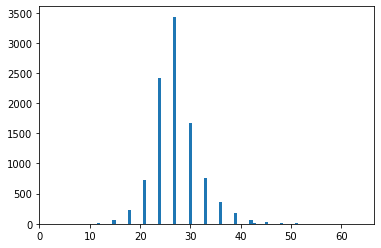

In [15]:
mean_true = np.mean(test_set)
var_true = np.var(test_set)
mean_est = []
var_est = []

sk_true = skew(test_set)
sk_est = []
kur_true = kurtosis(test_set)
kur_est = []

for t in time_res:
    res = quantisation(test_set, t)
    mean_est.append(np.mean(res))
    var_est.append(np.var(res))
    sk_est.append(skew(res))
    kur_est.append(kurtosis(res))
    if t == 3.025:
        plt.hist(res, 100)
plt.show()

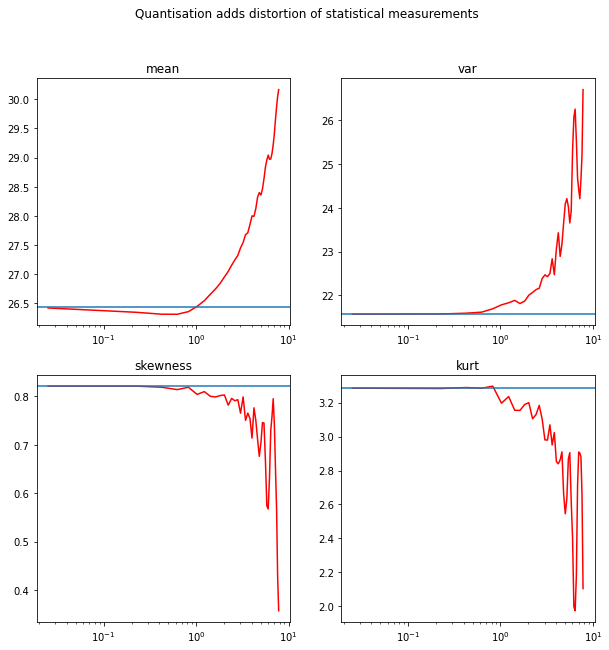

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Quantisation adds distortion of statistical measurements')
axs[0, 0].set_title('mean')
axs[0, 0].plot(time_res, mean_est, c='red')
axs[0, 0].set_xscale("log")
axs[0, 0].axhline(mean_true)
axs[0, 1].set_title('var')
axs[0, 1].plot(time_res, var_est, c='red')
axs[0, 1].set_xscale("log")
axs[0, 1].axhline(var_true)
axs[1, 0].set_title('skewness')
axs[1, 0].plot(time_res, sk_est, c='red')
axs[1, 0].set_xscale("log")
axs[1, 0].axhline(sk_true)
axs[1, 1].set_title('kurt')
axs[1, 1].plot(time_res, kur_est, c='red')
axs[1, 1].set_xscale("log")
axs[1, 1].axhline(kur_true)
plt.show()